In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\AYAN\OneDrive\Desktop\zomato\Notebook\Data\zomato.csv")

In [3]:
###check how many null value preent
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
## shape of data
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [7]:
## column in dataet
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
### remove duplicate value
df.duplicated().sum()

0

In [9]:
##removing null values
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df['rate'].isnull().sum()

7775

In [11]:
##rate will be our target column so at firt change into float
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-']
df['rate']=df['rate'].str.replace("","")
df['rate']=df['rate'].str.replace("-","NaN")
df['rate']=df['rate'].fillna('NaN')
df['rate']=df['rate'].apply(lambda x:str(x).replace("/5",""))

In [12]:
df['rate']=df['rate'].astype(float)

In [13]:
df['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

now rename ome fields

In [14]:
df=df.rename(columns={"approx_cost(for two people)":"avg_cost",
"listed_in(type)":"meal_type","listed_in(city)":"city"})

In [15]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,avg_cost,reviews_list,menu_item,meal_type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [16]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1190
location           21
rest_type         225
dish_liked      25948
cuisines           45
avg_cost          341
reviews_list        0
menu_item           0
meal_type           0
city                0
dtype: int64

Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

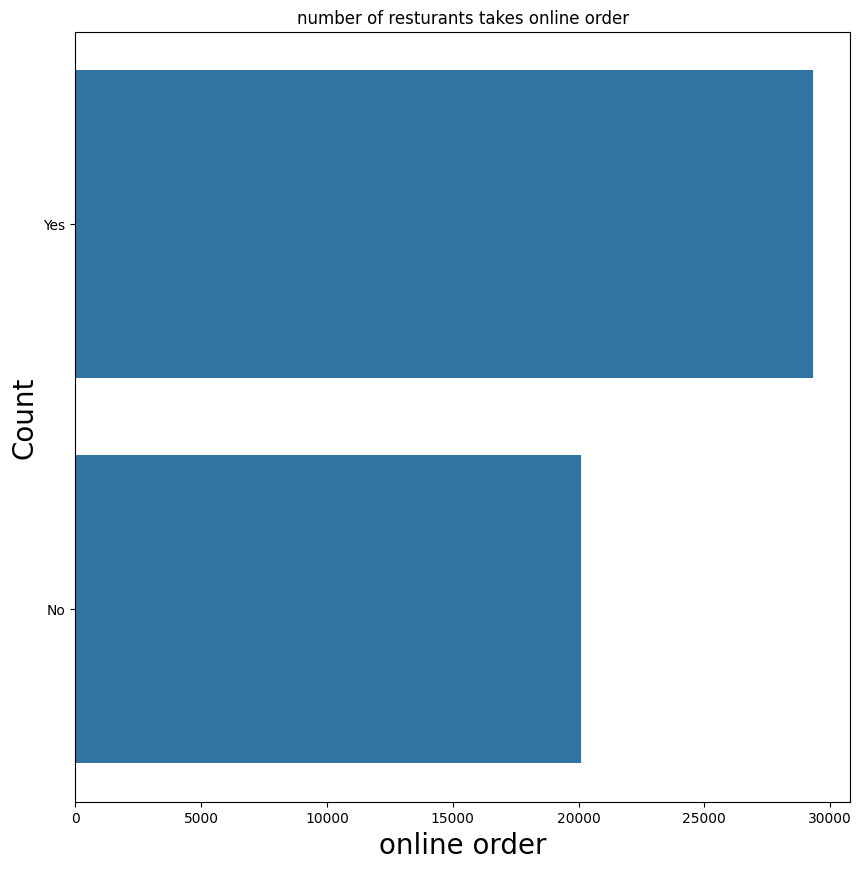

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df["online_order"])
plt.title("number of resturants takes online order")
plt.xlabel("online order",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

 Number of restaurants with meal type

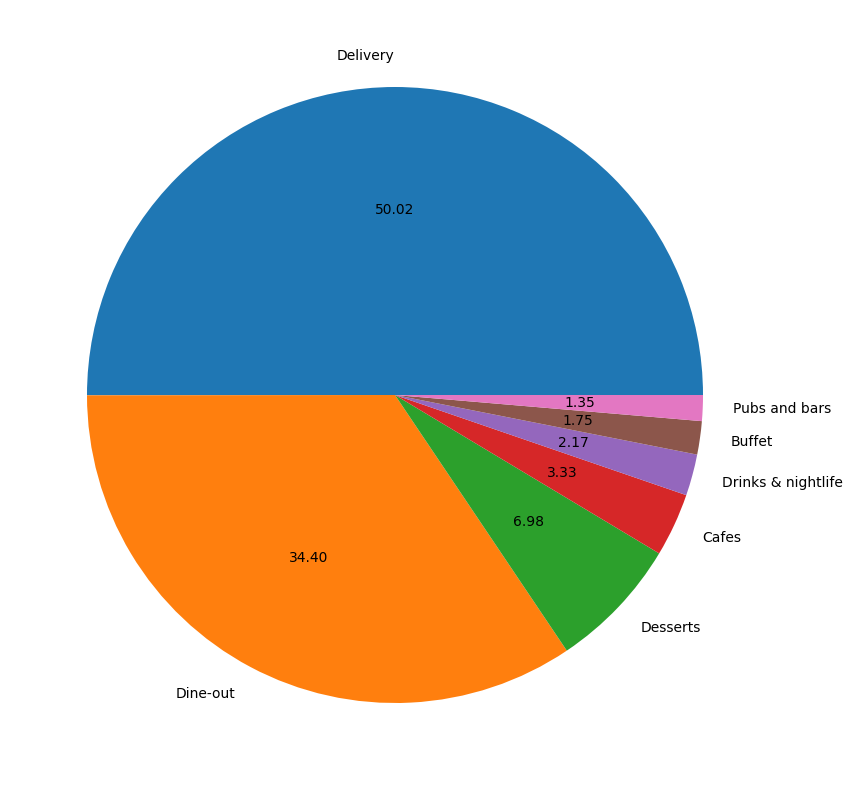

In [19]:
plt.figure(figsize=(10,10))
ax=df.meal_type.value_counts()
labels=df['meal_type'].value_counts().index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.show()

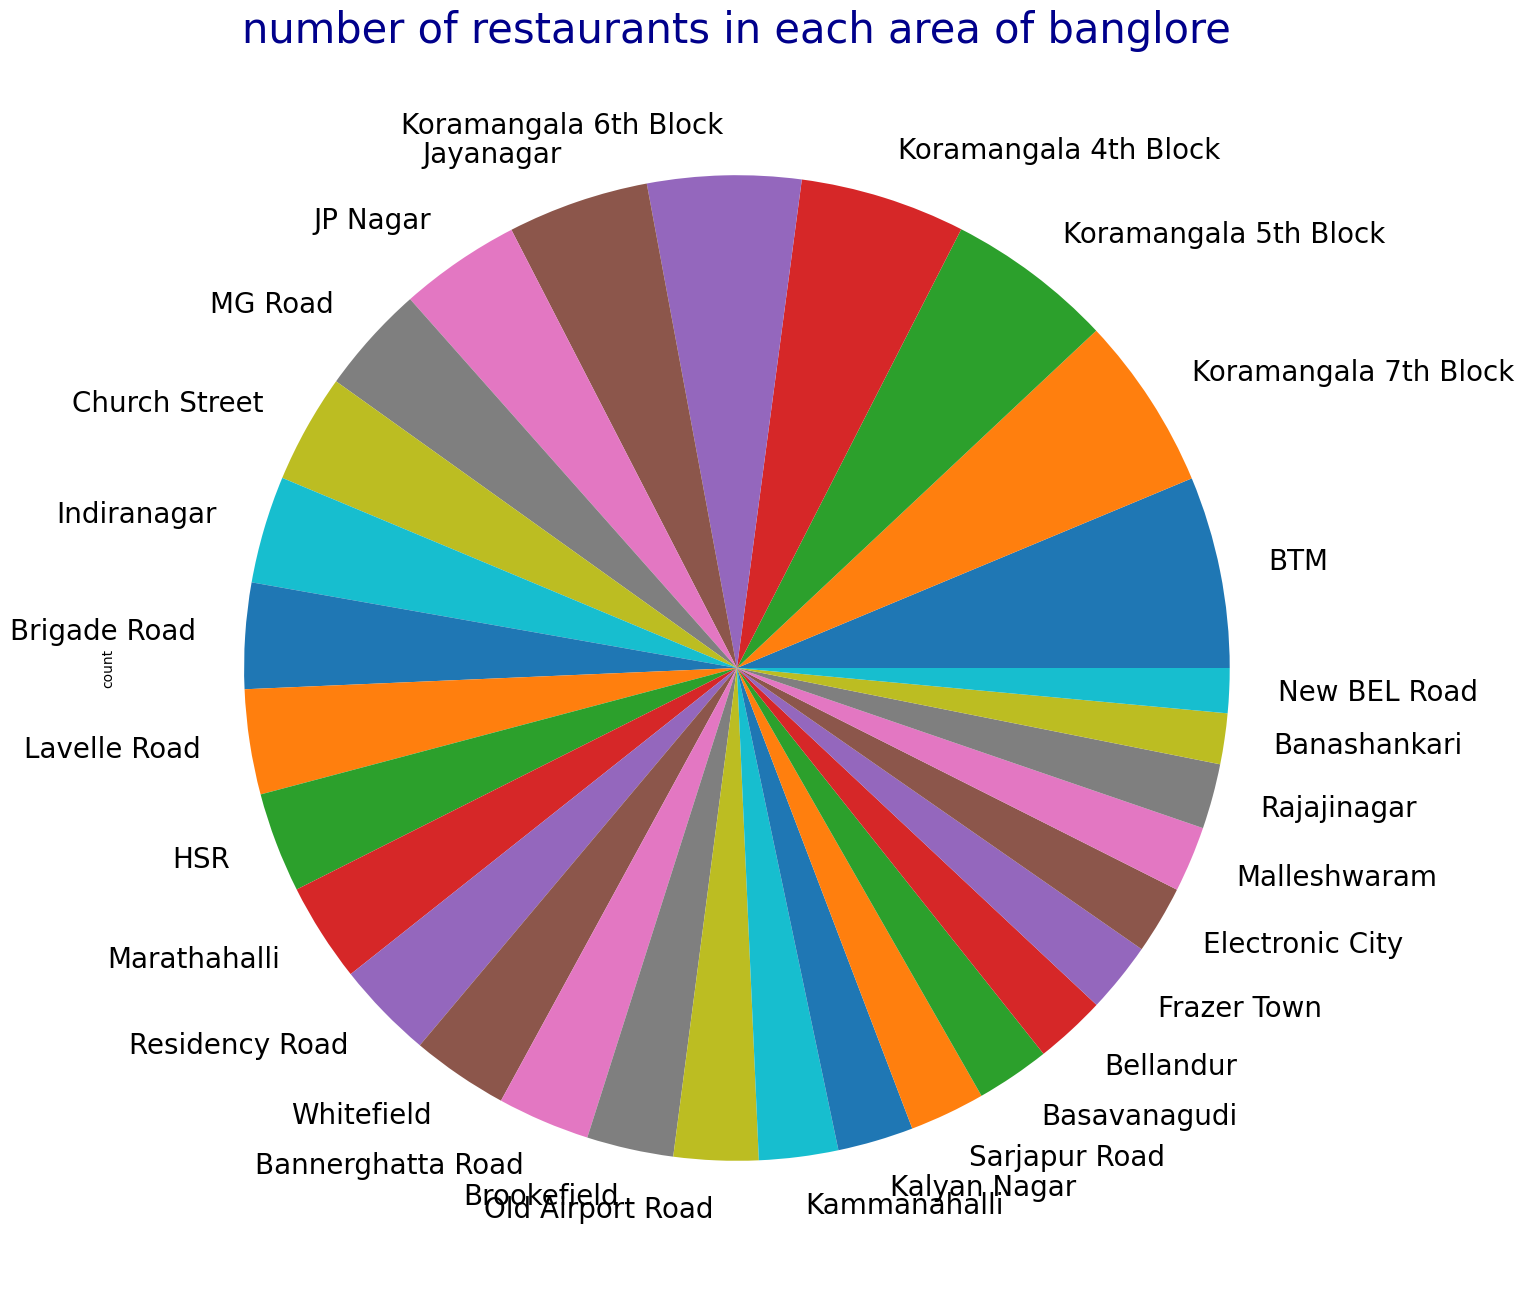

In [20]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of banglore',fontsize=30,color='darkblue')
plt.show()

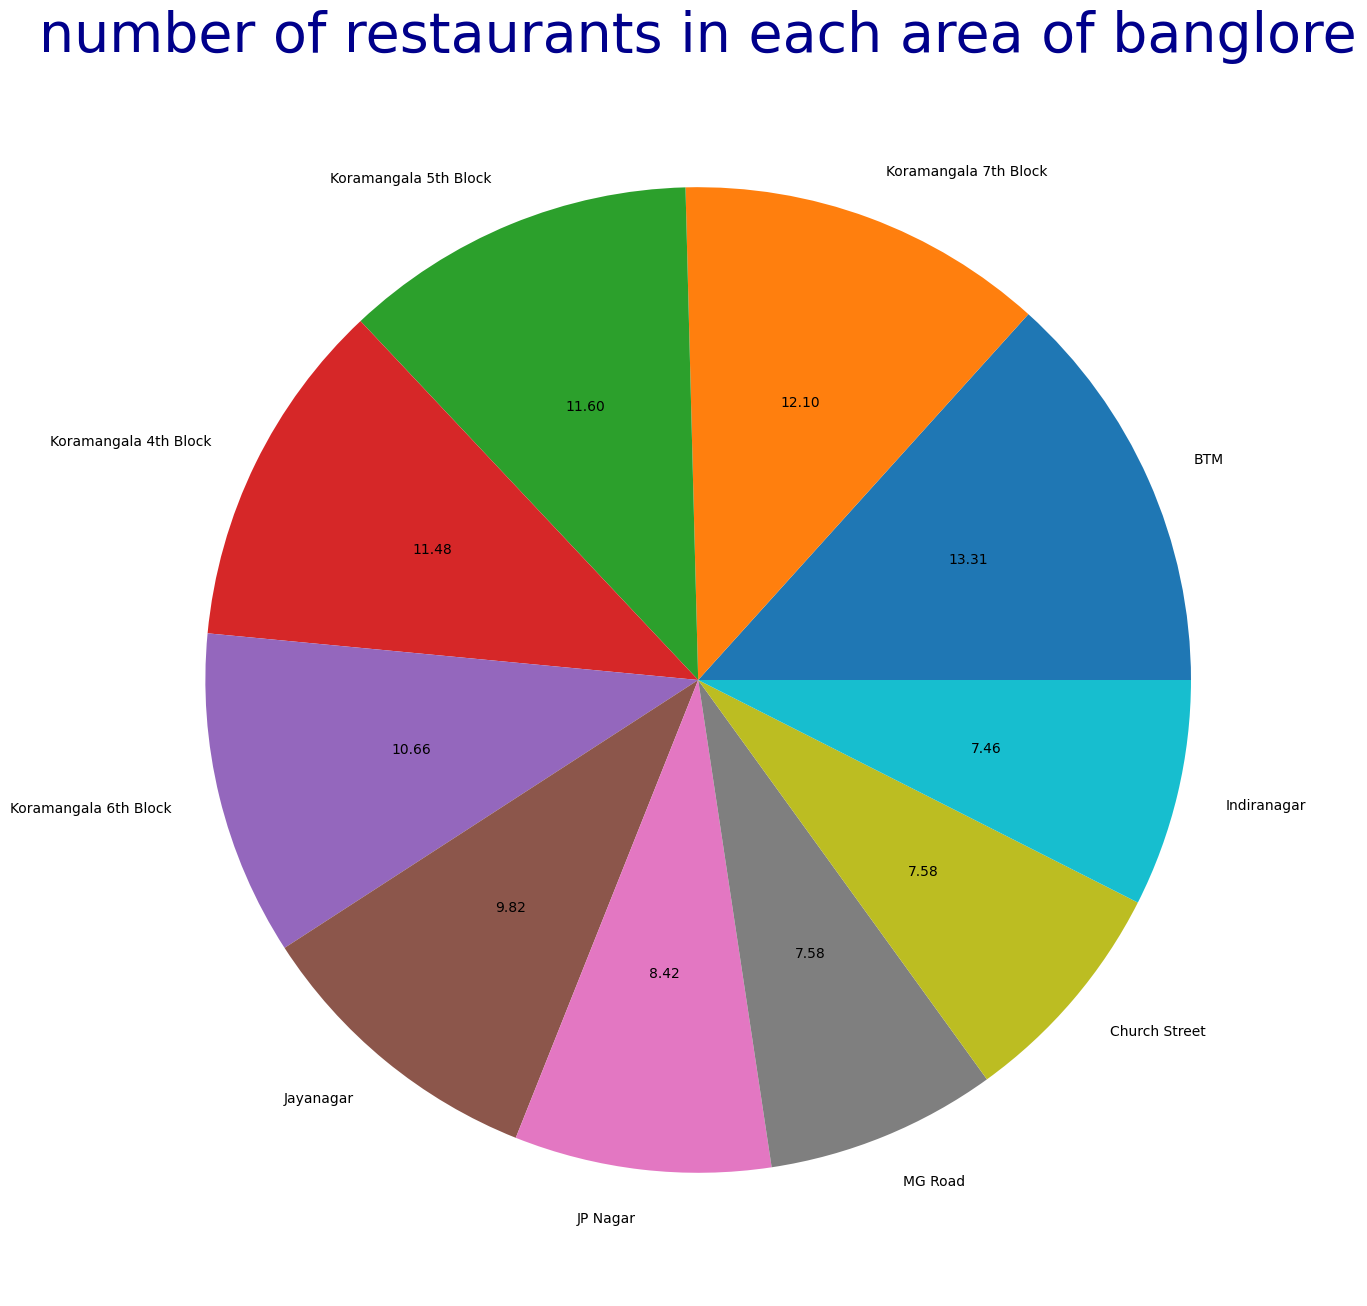

In [21]:
plt.figure(figsize=(16,16))

ax=df.city.value_counts()[:10]
labels=df['city'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of banglore',fontsize=40,color='darkblue')
plt.show()

<Axes: xlabel='city'>

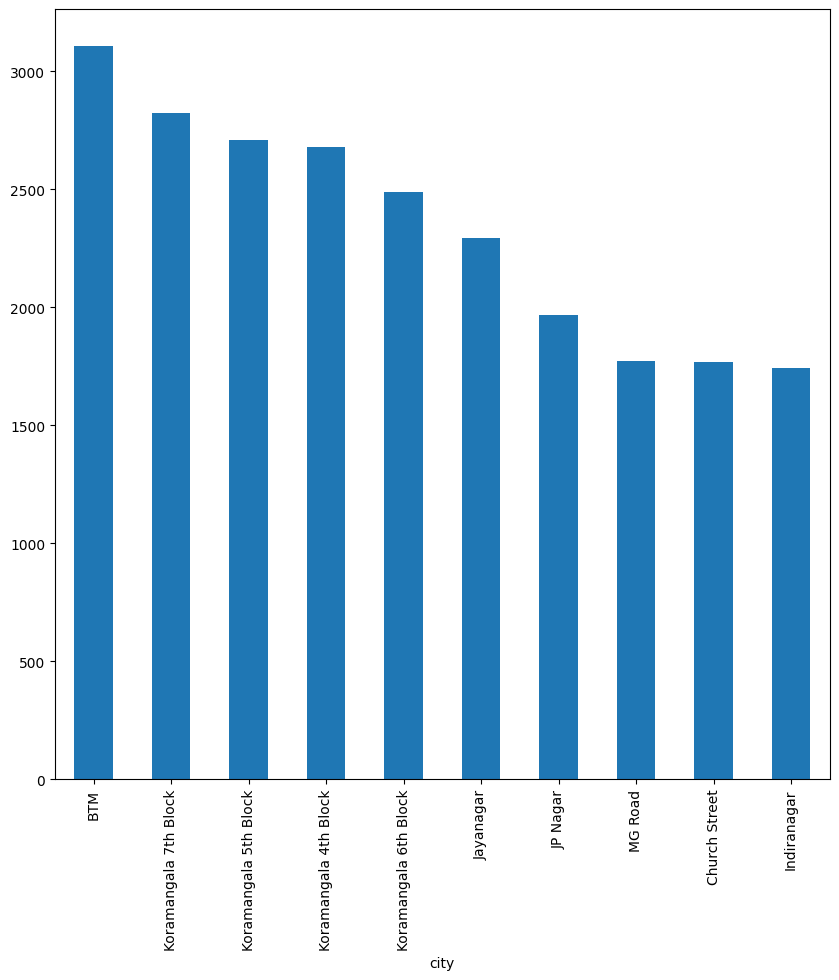

In [22]:
plt.figure(figsize=(10,10))
ax=df.city.value_counts()[:10]
ax.plot(kind='bar')

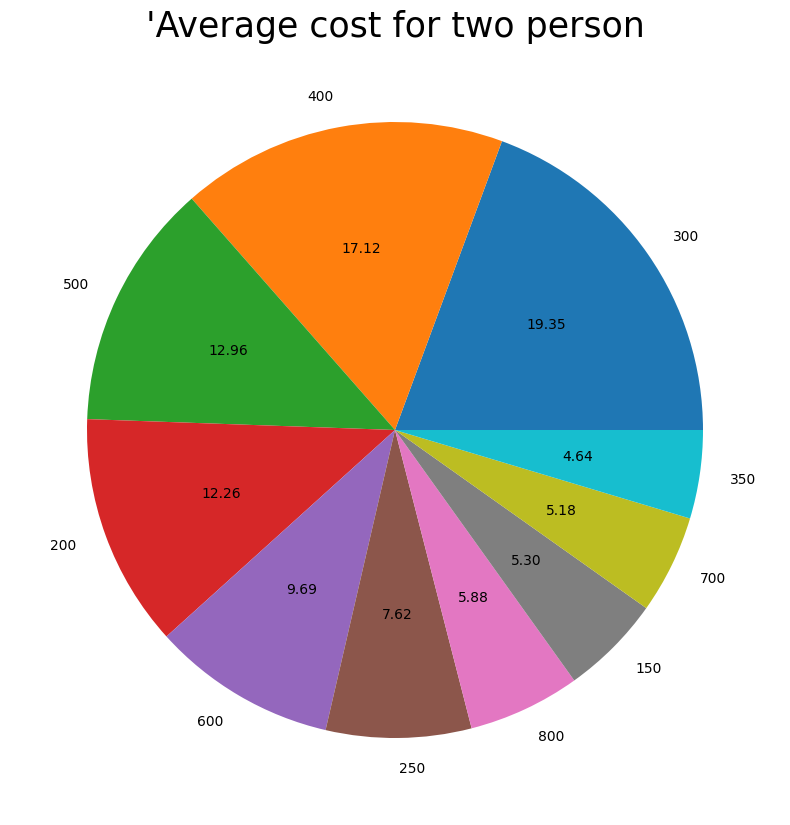

In [23]:
plt.figure(figsize=(10,10))
ax=df.avg_cost.value_counts()[:10]
label=df['avg_cost'].value_counts()[:10].index

plt.pie(ax,labels=label,autopct='%.2f')

plt.title("'Average cost for two person",fontsize=25)
plt.show()

###now we have to consider what i dependent and independent feature

In [24]:
##now drop null values
df.dropna(subset=['avg_cost','rest_type','location','cuisines','rate'],inplace=True)

In [25]:
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone             576
location            0
rest_type           0
dish_liked      18004
cuisines            0
avg_cost            0
reviews_list        0
menu_item           0
meal_type           0
city                0
dtype: int64

In [26]:
 ### Dropped irrelevant Columns
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']
del df['name']
df.head()

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [27]:
##now drop null values
df.dropna(subset=['avg_cost','rest_type','location','cuisines','rate'],inplace=True)

In [28]:
df.isnull().sum()

online_order        0
book_table          0
rate                0
votes               0
location            0
rest_type           0
dish_liked      18004
cuisines            0
avg_cost            0
meal_type           0
city                0
dtype: int64

## lets convert categorical data to numerical data

In [29]:
x=df.drop(labels=['rate'],axis=1,inplace=False)

In [30]:
y=df['rate']

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ridge_regression,Lasso

In [32]:
label=LabelEncoder()

In [33]:
list1=['online_order','book_table','rest_type','cuisines','avg_cost','city','location','dish_liked','meal_type']
for i in list1:
    x[i]=label.fit_transform(x[i])

x.head()

,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,avg_cost,meal_type,city
0,1,1,775,1,24,3604,1894,59,0,1
1,1,0,787,1,24,2930,816,59,0,1
2,1,0,918,1,19,1398,653,59,0,1
3,0,0,88,1,73,2732,2221,39,0,1
4,0,0,166,4,24,3412,1921,53,0,1


In [34]:
x.dtypes

online_order    int32
book_table      int32
votes           int64
location        int32
rest_type       int32
dish_liked      int32
cuisines        int32
avg_cost        int32
meal_type       int32
city            int32
dtype: object

In [35]:
scaler=StandardScaler()
scaler.fit_transform(x)

array([[ 0.72284685,  2.35489419,  0.4776437 , ...,  1.21422388,
        -2.39826665, -1.60130244],
       [ 0.72284685, -0.42464753,  0.4912158 , ...,  1.21422388,
        -2.39826665, -1.60130244],
       [ 0.72284685, -0.42464753,  0.63937785, ...,  1.21422388,
        -2.39826665, -1.60130244],
       ...,
       [-1.38341891, -0.42464753, -0.36835028, ..., -1.72357186,
         2.72815954,  1.78142341],
       [-1.38341891,  2.35489419, -0.13196961, ..., -0.72472131,
         2.72815954,  1.78142341],
       [-1.38341891, -0.42464753, -0.38418439, ..., -1.72357186,
         2.72815954,  1.78142341]])

In [36]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

## Linnear Regresion

In [37]:
from sklearn.linear_model import LinearRegression,ridge_regression,Lasso
from sklearn.metrics import r2_score

In [38]:
reg=LinearRegression()
scaled_data=reg.fit(X_train,y_train)

In [39]:
pred_data=reg.predict(X_test)

In [40]:
from sklearn.metrics import r2_score
predict_data=r2_score(y_test,pred_data)*100
print("Accuracy score for LR :",predict_data)

Accuracy score for LR : 34.70347654472023


Ridge

In [41]:
from sklearn.linear_model import Ridge
rr=Ridge()

In [42]:
x_scaled=rr.fit(X_train,y_train)

In [43]:
x_pred1=rr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score
predict_data1=r2_score(y_test,x_pred1)*100
print("Accuricy score: ",predict_data1)

Accuricy score:  34.70356314216188


## Lesso

In [45]:
from sklearn.linear_model import Lasso
ls=Lasso()

In [46]:
x_scaled_1=ls.fit(X_train,y_train)

In [47]:
predict2=ls.predict(X_test)

In [48]:
predict_data_2=r2_score(y_test,predict2)*100
print("accuricy score for lasso is:",predict_data_2)

accuricy score for lasso is: 28.685100146828525


##SVM

In [49]:
from sklearn.svm import SVR
svr=SVR()

In [50]:
trained_data=svr.fit(X_train,y_train)

In [51]:
pred_3=svr.predict(X_test)

In [52]:
predict_data_3=r2_score(y_test,pred_3)*100
print("accuricy_score of svm is:",predict_data_3)

accuricy_score of svm is: 41.42769142637688


## RandomForest

In [53]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()


In [54]:
scaled_train=reg.fit(X_train,y_train)

In [55]:
predict_reg=reg.predict(X_test)

In [56]:
predict_data_4=r2_score(y_test,predict_reg)*100
print("my accuricy score is:",predict_data_4)

my accuricy score is: 93.62884840363604


In [57]:
pd.DataFrame({"Model Names":['Linear Reg','Ridge Reg','Lasso Reg','Support Vector Reg','RandomForest Reg'],
            "Accuracy socre":[predict_data,predict_data1,predict_data_2,predict_data_3,predict_data_4]})

,Model Names,Accuracy socre
0,Linear Reg,34.703477
1,Ridge Reg,34.703563
2,Lasso Reg,28.685100
3,Support Vector Reg,41.427691
4,RandomForest Reg,93.628848


## We see that Randomforest give the best accuracy

In [58]:
reg.predict([[1,0,13,73,1900,350,27,78,48,190]])

c:\Users\AYAN\OneDrive\Desktop\zomato\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([3.441])

In [69]:
plt.figure(figsize=(30,10))
sns.histplot(x=x,y=y,kde=True,hue=x['online_order'])

ValueError: Data must be 1-dimensional, got ndarray of shape (41263, 10) instead

<Figure size 3000x1000 with 0 Axes>